# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

### Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# 1. Get the numerical variables from our dataset.


In [2]:
df = pd.read_csv('/Users/kt/Desktop/Ironhack/Data-Analytics-Ironhack/unit-4/lab-cleaning-numerical-data/we_fn_use_c_marketing_customer_value_analysis.csv')

# standardize column name following PE8
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))] 
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# get numerical data
numerical = df.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [4]:
numerical.shape

(9134, 8)

In [5]:
# I suspect that some columns are considered as categorical 

for column in numerical.columns:
    print("\n" + column)
    print(numerical[column].nunique())


customer_lifetime_value
8041

income
5694

monthly_premium_auto
202

months_since_last_claim
36

months_since_policy_inception
100

number_of_open_complaints
6

number_of_policies
9

total_claim_amount
5106


In [6]:
# check number_of_open_complaints
numerical['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [7]:
# check number_of_policies
numerical['number_of_policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [26]:
num = numerical.drop(['number_of_open_complaints', 'number_of_policies'], axis=1)
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

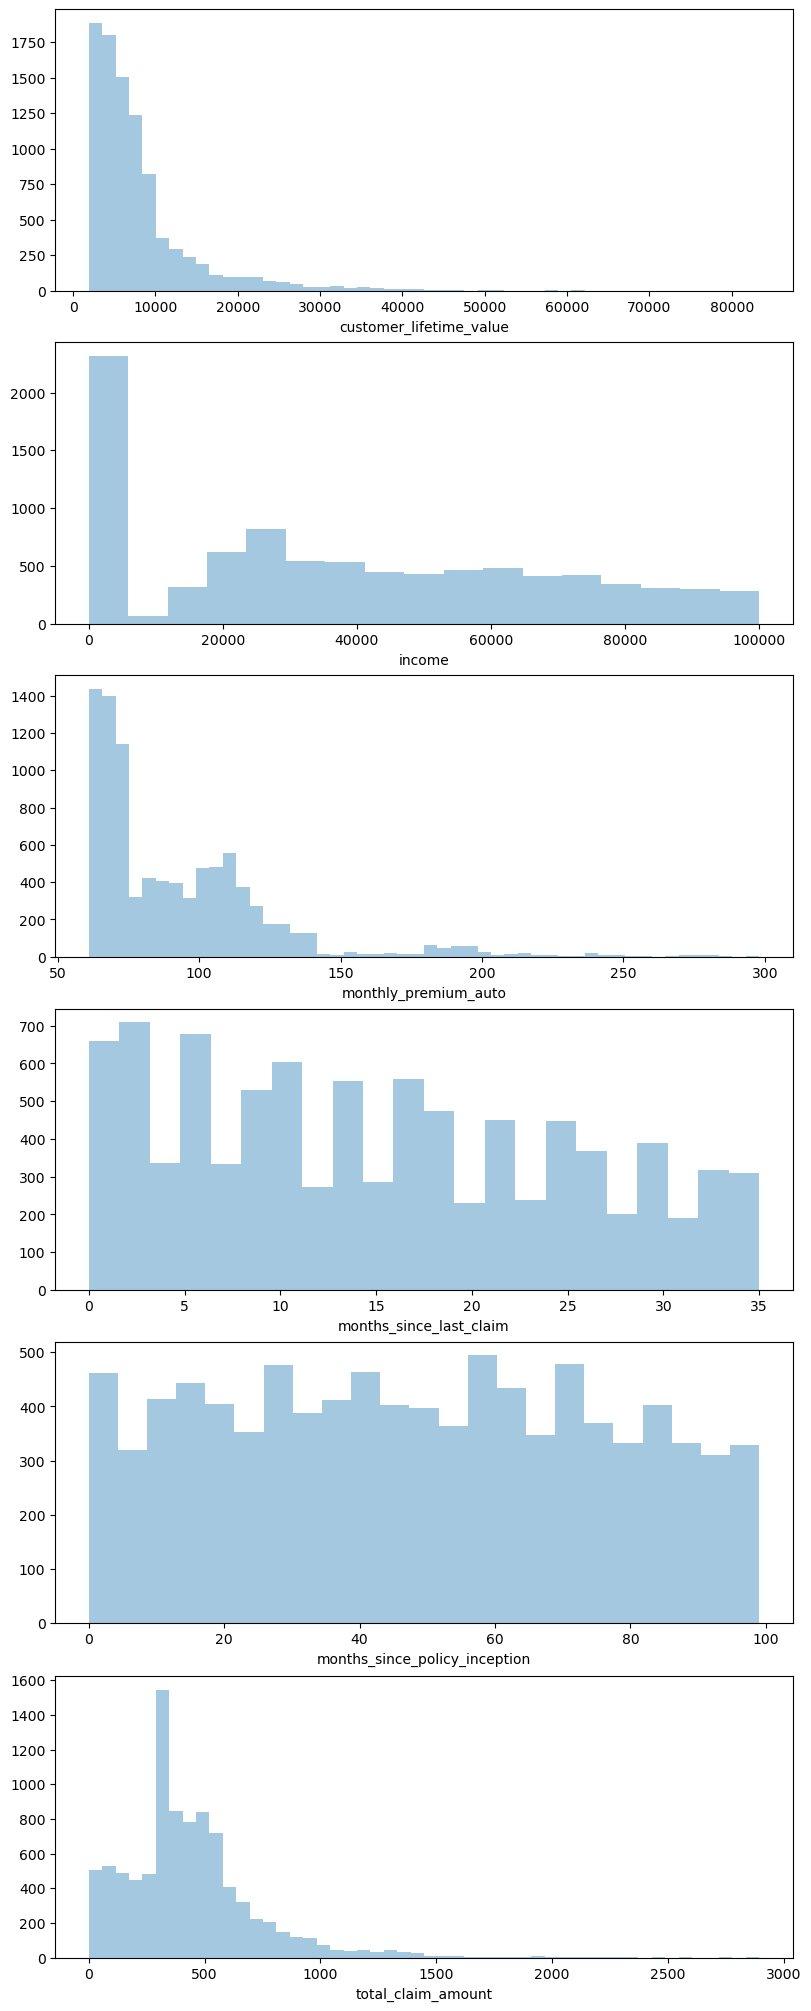

In [27]:
fig = plt.figure(figsize = (8, 20), constrained_layout = True)

for i, column in enumerate(num.columns):
    fig.add_subplot(6, 1, i + 1)
    sns.distplot(num[column], kde = False)

- **Exponential distribution**: customer_lifetime_value, monthly_premium_auto, income (potentially but not exactly)

- **Normal distribution**: total_claim_amount has a potential to transform into normal distribution (maybe)

- **Discrete variables**: months_since_last_claim, months_since_policy_inception, number_of_open_complaints - not considered normal nor exponential distribution


# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### 3.1 Log-transformation 

In [29]:
# remove discrete cariables from this set before log-tranformation
num = numerical.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)


#create log-transformed data
num_log = np.log(num)
num_log.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,7.924260,10.937988,4.234107,5.952753
1,8.850738,-inf,4.543295,7.031268
2,9.464008,10.794809,4.682131,6.339428
3,8.941920,-inf,4.663439,6.272653
4,7.942253,10.688211,4.290459,4.928202


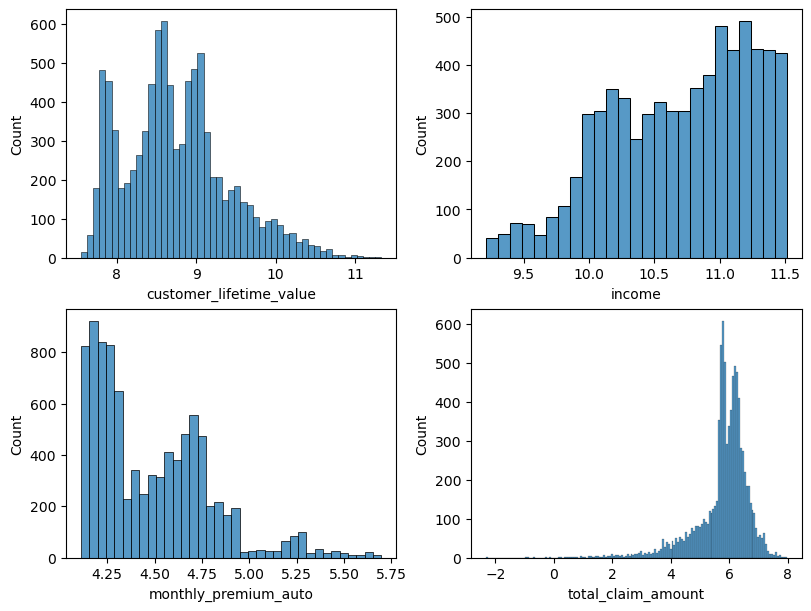

In [34]:
fig = plt.figure(figsize = (8, 6), constrained_layout = True)

for i, column in enumerate(num_log.columns):
    fig.add_subplot(2, 2, i + 1)
    sns.histplot(num_log[column], kde = False)

### 3.2 Box.Cox transformation

In [37]:
df_trans = num.copy()

def boxcox_transform(df):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df_trans[column] = np.where(df_trans[column]<=0, np.NAN, df_trans[column]) 
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(df_trans)
df_trans.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2.703839,1247.937066,0.685347,33.035752
1,2.754926,1167.961720,0.685871,56.357614
2,2.780772,1144.063081,0.686039,40.071789
3,2.759125,1167.961720,0.686018,38.763252
4,2.704995,1072.375744,0.685461,19.560154


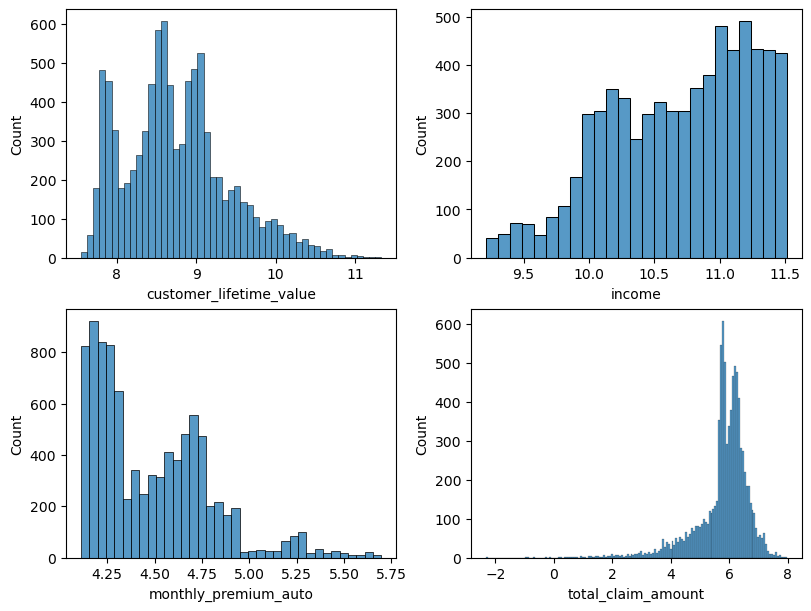

In [36]:
fig = plt.figure(figsize = (8, 6), constrained_layout = True)

for i, column in enumerate(df_trans.columns):
    fig.add_subplot(2, 2, i + 1)
    sns.histplot(num_log[column], kde = False)

### Observe

After applying log- and BoxCox-transformation, customer_lifetime_value and total_claim_amount look more like normal distribution. Specifically with total_claim_amount, if we working on its outliers this could be more bell-like.